In [145]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

In [153]:
path=r"C:\Users\osmai\Downloads\archive (6)\penguins.csv"
df=pd.read_csv(path)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [155]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [171]:
df=df.dropna(how='any')

In [159]:
df['sex']=df['sex'].map({'MALE':0,'FEMALE':1})

In [173]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [177]:
df=df.rename(columns={'culmen_length_mm':'longitud_pico_mm',
                     'culmen_depth_mm':'profundidad_pico_mm',
                     'flipper_length_mm':'longitud_aleta_mm',
                     'body_mass_g':'masa_corporal_g'})
df.head()

,longitud_pico_mm,profundidad_pico_mm,longitud_aleta_mm,masa_corporal_g,sex
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
4,36.7,19.3,193.0,3450.0,1.0
5,39.3,20.6,190.0,3650.0,0.0


### necesitamos estandarizar los datos porque vemos rangos muy dispares entre las variables.

In [191]:
from sklearn.preprocessing import StandardScaler
X_scaled=StandardScaler()
X=X_scaled.fit_transform(df)
df_Scaled=pd.DataFrame(X,columns=df.columns)
print(df_Scaled)

     longitud_pico_mm  profundidad_pico_mm  longitud_aleta_mm  \
0           -0.896113             0.774517          -0.126674   
1           -0.822764             0.114726          -0.107681   
2           -0.676065             0.419245          -0.073493   
3           -1.336209             1.079036          -0.081090   
4           -0.859439             1.738827          -0.092486   
..                ...                  ...                ...   
329          0.589210            -1.763140          -0.001319   
330          0.515861            -1.458621           0.002479   
331          1.176005            -0.748077           0.029070   
332          0.222464            -1.204855          -0.008917   
333          1.084318            -0.545064          -0.005118   

     masa_corporal_g       sex  
0          -0.569485 -0.988095  
1          -0.507204  1.012049  
2          -1.192302  1.012049  
3          -0.943175  1.012049  
4          -0.694049 -0.988095  
..               ... 

In [240]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_Scaled)


C:\Users\osmai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\osmai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\osmai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\osmai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

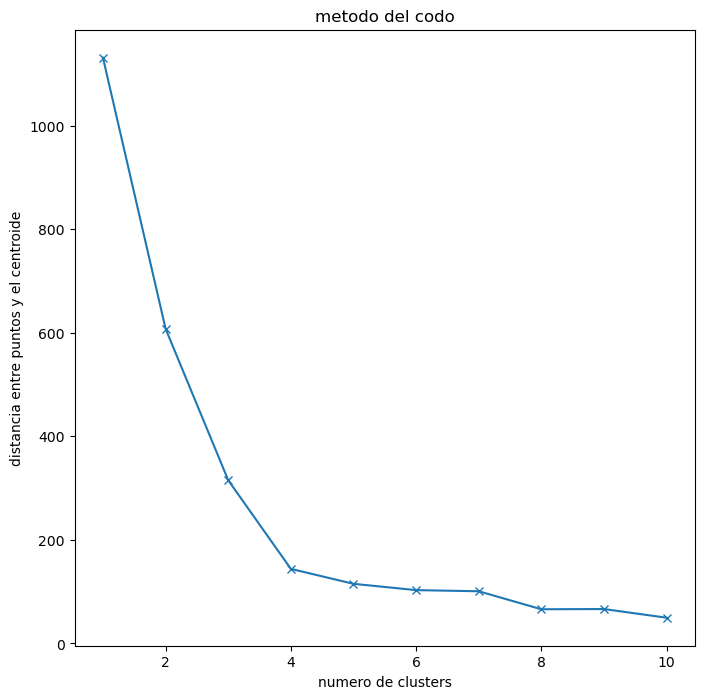

In [197]:
wws=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_pca)
    wws.append(kmeans.inertia_)
plt.figure(figsize=(8,8))
plt.plot(range(1,11),wws,marker='x')
plt.title('metodo del codo')
plt.xlabel('numero de clusters')
plt.ylabel('distancia entre puntos y el centroide')
plt.show()


## vemos claramente que el mejor numero de cluster en este caso es 4

In [223]:
kmeans=KMeans(n_clusters=4,init='k-means++')
y_kmeans=kmeans.fit_predict(X_pca)
y_kmeans


C:\Users\osmai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 3, 0, 3, 3,
       0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3,
       0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3,
       0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,

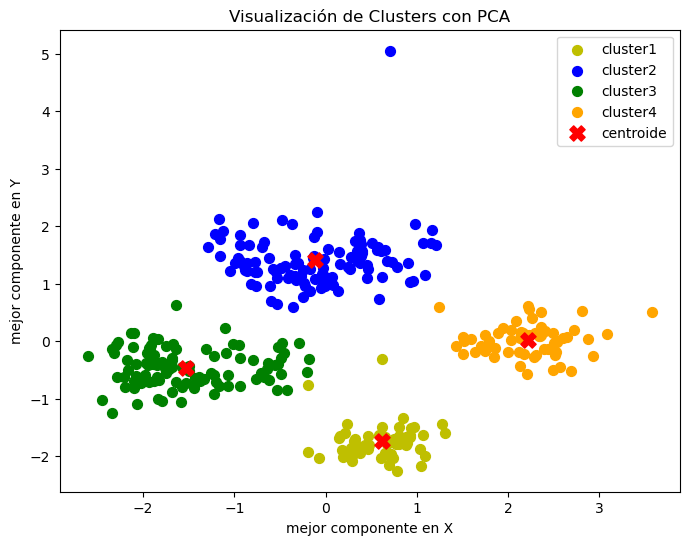

In [237]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_kmeans==0,0], X_pca[y_kmeans==0,1], s=50,c='y',label='cluster1')
plt.scatter(X_pca[y_kmeans==1,0], X_pca[y_kmeans==1,1], s=50,c='blue',label='cluster2')
plt.scatter(X_pca[y_kmeans==2,0], X_pca[y_kmeans==2,1], s=50,c='green',label='cluster3')
plt.scatter(X_pca[y_kmeans==3,0], X_pca[y_kmeans==3,1], s=50,c='orange',label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=120, marker='X',label='centroide')
plt.title("Visualización de Clusters con PCA")
plt.xlabel('mejor componente en X')
plt.ylabel('mejor componente en Y')
plt.legend()
plt.show()

### vemos como el algoritmo clasifica correctamente los pinguinos segun sus caracteristicas especialesm como profundidad del pico, su genero y su longitud de aleta, en 4 diferentes tipos de pinguinos. 